In [ ]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics

## PDF, CDF, and PPF

* pdf: Probability Density Function
* cdf: Cumulative Distribution Function
* ppf: Percent Point Function (inverse of cdf)
* Reference manual: https://docs.scipy.org/doc/scipy/reference/stats.html

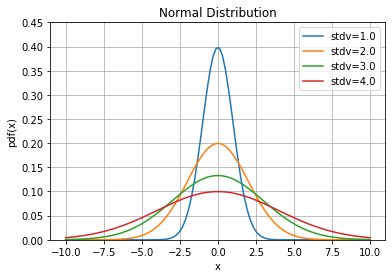

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, stats.norm.pdf(x,loc=0,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

PPF is actually the inverse value of CDF.

In [ ]:
a = np.array([2,-1,4,1,3,0])
print(stats.norm.cdf(a))

[0.97724987 0.15865525 0.99996833 0.84134475 0.9986501  0.5       ]


In [ ]:
a = np.array([0.97724987,0.15865525,0.99996833, 0.84134475, 0.9986501,0.5])
print(stats.norm.ppf(a))

[ 2.00000004 -1.00000002  4.00000928  1.00000002  2.99999956  0.        ]


In [ ]:
alpha = 0.68
q = alpha + (1-alpha)/2
# ppf = Percent point function (inverse of cdf)
print(stats.norm.ppf(q))
print(q)

0.9944578832097535
0.8400000000000001


In [ ]:
alpha = 0.95
q = alpha + (1-alpha)/2
# ppf = Percent point function (inverse of cdf)
stats.norm.ppf(q)

1.959963984540054

In [ ]:
alpha = 0.99
q = alpha + (1-alpha)/2
# ppf = Percent point function (inverse of cdf)
stats.norm.ppf(q)

2.5758293035489004

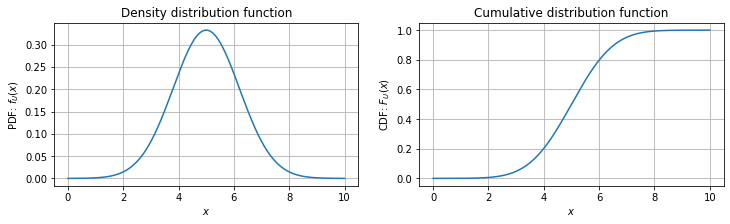

In [ ]:
# X variable should contain the normal distribution from stats package.
mu = 5
sigma = 1.2
X = stats.norm(loc=mu, scale=sigma)

x = np.linspace(0,10,1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax1.plot(x, X.pdf(x))
ax1.set_xlabel('$x$')
ax1.set_ylabel('PDF: $f_U(x)$')
ax1.set_title('Density distribution function')
ax1.grid(True)

ax2.plot(x, X.cdf(x))
ax2.set_xlabel('$x$')
ax2.set_ylabel('CDF: $F_U(x)$')
ax2.set_title('Cumulative distribution function')
ax2.grid(True)
plt.show()

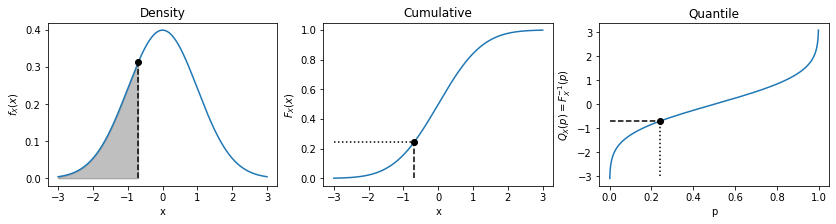

In [ ]:
z0 = -0.7

# To have fun with sliders, uncomment the line below
# z0 = -0.9 #@param {type:"slider", min:-3, max:3, step:0.1}

# or you can use the "Insert > Add a form field" menu of Google Colab.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,3))
x = np.arange(-3,3,0.001)
mu = 0
sigma =1

z = x[x<z0]
f0 = stats.norm.pdf(z0, mu, sigma)
ax1.plot(x, stats.norm.pdf(x, mu, sigma))
ax1.fill_between(z, 0, stats.norm.pdf(z, mu, sigma), alpha=0.25, color='k')
ax1.plot(z0, f0, 'ko')
ax1.plot([z0, z0],[0, stats.norm.pdf(z0, mu, sigma)], 'k--')
ax1.set_xlabel('x')
ax1.set_ylabel('$f_X(x)$')
ax1.set_title('Density')

F0 = stats.norm.cdf(z0, mu, sigma)
ax2.plot(x, stats.norm.cdf(x, mu, sigma))
ax2.plot(z0, F0, 'ko')
ax2.plot([z0, z0],[0, F0], 'k--')
ax2.plot([-3, z0],[F0, F0], 'k:')
ax2.set_xlabel('x')
ax2.set_ylabel('$F_X(x)$')
ax2.set_title('Cumulative')

p = np.linspace(0,1,1000)
ax3.plot(p, stats.norm.ppf(p, mu, sigma))
ax3.plot(F0, z0, 'ko')
ax3.plot([0, F0], [z0, z0], 'k--')
ax3.plot([F0, F0], [-3, z0], 'k:')
ax3.set_xlabel('p')
ax3.set_ylabel('$Q_X(p)=F_X^{-1}(p)$')
ax3.set_title('Quantile')
    
plt.show()


## Obtaining Random Samples

Use rvs() to get random samples

In [ ]:
# Generate random numbers:
data = stats.norm.rvs(size=10000)

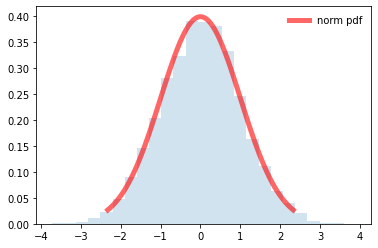

In [ ]:
# compare the histogram:
fig, ax = plt.subplots()
x = np.linspace(stats.norm.ppf(0.01), # ppf = Percent point function (inverse of cdf — percentiles)
                stats.norm.ppf(0.99), 100)
ax.plot(x, stats.norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(data, bins=25, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
n, min_max, mean, var, skew, kurt = stats.describe(data)

In [ ]:
std = math.sqrt(var)
std

0.9949132437327638

In [ ]:
statistics.stdev(data)

0.9949132437327638

In [ ]:
# Compute standard error of the mean
stats.sem(data)

0.009949132437327639

In [ ]:
# standard error of the mean (sem)
sem = math.sqrt(var)/math.sqrt(n)
sem

0.009949132437327639

## Confidence Internval of Norm Distribution



In [ ]:
#define sample data
n = 50
np.random.seed(0)
data = np.random.randint(10, 30, n)

In [ ]:
n, min_max, mean, var, skew, kurt = stats.describe(data)
# standard error of the mean (sem)
sem = math.sqrt(var)/math.sqrt(n)
print(sem)
print(stats.sem(data))

0.9387616680434684
0.9387616680434684


In [ ]:
#create 95% confidence interval for population mean weight
stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=stats.sem(data))

(17.400060940568054, 21.079939059431943)

In [ ]:
# create 99% confidence interval for same sample
stats.norm.interval(alpha=0.99, loc=np.mean(data), scale=stats.sem(data))

(16.821910186405187, 21.65808981359481)

In [ ]:
alpha = 0.99
q = alpha + (1-alpha)/2
# ppf = Percent point function (inverse of cdf)
c_lb = np.mean(data) - stats.norm.ppf(q)*stats.sem(data) # Lower bound
c_ub = np.mean(data) + stats.norm.ppf(q)*stats.sem(data) # Upper bound
print(c_lb, c_ub)

16.821910186405187 21.65808981359481


In [ ]:
alpha = 0.90
q = alpha + (1-alpha)/2
# ppf = Percent point function (inverse of cdf)
std = 0.95
sem = std/math.sqrt(32)
c_lb = 3.90 - stats.norm.ppf(q)*sem # Lower bound
c_ub = 3.90 + stats.norm.ppf(q)*sem # Upper bound
print(stats.norm.ppf(q), stats.norm.ppf(q, loc=3.90))
print(c_lb, c_ub)

1.6448536269514722 5.544853626951472
3.62376680100179 4.17623319899821


## Student's t distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

The probability density function for t is:

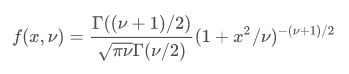

where $x$ is a real number and the degrees of freedom parameter $v$ (denoted df in the implementation) satisfies $v>0$. $Γ$ is the gamma function ([scipy.special.gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html#scipy.special.gamma)).

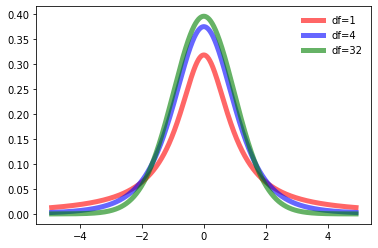

In [ ]:
fig, ax = plt.subplots(1, 1)
df = 2.74
mean, var, skew, kurt = stats.t.stats(df, moments='mvsk')
x = np.linspace(stats.t.ppf(0.01, df),
                stats.t.ppf(0.99, df), 1000)

ax.plot(x, stats.t.pdf(x, 1),
       'r-', lw=5, alpha=0.6, label='df=1')

ax.plot(x, stats.t.pdf(x, 4),
       'b-', lw=5, alpha=0.6, label='df=4')

ax.plot(x, stats.t.pdf(x, 32),
       'g-', lw=5, alpha=0.6, label='df=32')

# r = stats.t.rvs(df, size=1000)
# ax.hist(r, bins=30, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

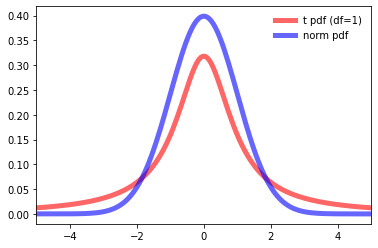

In [ ]:
fig, ax = plt.subplots(1, 1)
df = 1
mean, var, skew, kurt = stats.t.stats(df, moments='mvsk')
x = np.linspace(stats.t.ppf(0.01, df),
                stats.t.ppf(0.99, df), 1000)

ax.plot(x, stats.t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf (df=1)')

ax.plot(x, stats.norm.pdf(x),
       'b-', lw=5, alpha=0.6, label='norm pdf')

# r = stats.t.rvs(df, size=1000)
# ax.hist(r, bins=30, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.xlim(-5,5)
plt.show()

## Confidence Interval of t-Distribution

In [ ]:
data = [-0.04, -0.19, 0.14, -0.09, -0.14, 0.19, 0.04, 0.09]
print(np.mean(data))
print(statistics.stdev(data))

0.0
0.13669569958749356


In [ ]:
alpha = 0.90
q = alpha + (1-alpha)/2
df = len(data)-1
# ppf = Percent point function (inverse of cdf)
c_lb = np.mean(data) - stats.t.ppf(q, df)*stats.sem(data) # Lower bound
c_ub = np.mean(data) + stats.t.ppf(q, df)*stats.sem(data) # Upper bound
print(stats.t.ppf(q, df), stats.sem(data))
print(c_lb, c_ub)

1.894578605061305 0.04832922806867792
-0.09156352149804547 0.09156352149804547


In [ ]:
# create 90% confidence interval for population mean weight
stats.t.interval(alpha=0.90, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data)) 

(-0.0915635214980455, 0.09156352149804547)

In [ ]:
# create 95% confidence interval for population mean weight
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data)) 

(-0.11428046472380346, 0.11428046472380346)

In [ ]:
# create 99% confidence interval for same sample
stats.t.interval(alpha=0.99, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data)) 

(-0.16912732640018147, 0.16912732640018147)

In [ ]:
alpha = 0.99
ci = alpha + (1-alpha)/2
df = len(data)-1
# ppf = Percent point function (inverse of cdf)
c_lb = np.mean(data) - stats.t.ppf(ci, df)*stats.sem(data) # Lower bound
c_ub = np.mean(data) + stats.t.ppf(ci, df)*stats.sem(data) # Upper bound
print(c_lb, c_ub)

-0.16912732640018147 0.16912732640018147
